In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = os.path.join(os.path.dirname(os.getcwd()), 'data')

In [ ]:
# Load the main dataset
full_data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "original", "card_transdata.csv")
df = pd.read_csv(full_data_path)
print("Dataset loaded.")

print(df.head())
print(df.info())


In [ ]:
print(f"Total number of samples: {len(df)}")

In [ ]:
df.describe()

In [ ]:
# Check for missing values
print("\nMissing values in each column:")

print(df.isnull().sum())

In [ ]:
sns.countplot(data=df, x='fraud', hue='fraud', palette='Set2', legend=False)
plt.title("Distribution of Fraud Labels")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Split into stratified train and test sets
train_df, test_df = train_test_split(
    df,
    test_size=0.5,
    random_state=42,
    stratify=df["fraud"]
)

In [ ]:
# Save the split datasets
save_splits = True 
output_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
if save_splits:
    train_path = os.path.join(output_dir, "training", "card_transdata_part1.csv")
    test_path = os.path.join(output_dir, "testing", "card_transdata_part2.csv")

    train_df.to_csv(train_path, index=False)
    test_df.to_csv(test_path, index=False)

    print("\nStratified split completed and files saved.")
    print(f"Train set path: {train_path}")
    print(f"Test set path:  {test_path}")

In [ ]:
# Display class distribution of the 'fraud' column
print("\n--- FRAUD Class Distribution ---")

print("\n[Train Set - Part 1]")
print(train_df["fraud"].value_counts(normalize=True))
print(train_df["fraud"].value_counts())

print("\n[Test Set - Part 2]")
print(test_df["fraud"].value_counts(normalize=True))
print(test_df["fraud"].value_counts())

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Separate features and target
X_train = train_df.drop(columns=['fraud'])
y_train = train_df['fraud']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_resampled))


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

counter_res = Counter(y_resampled)

plt.figure(figsize=(6, 4))
plt.bar(counter_res.keys(), counter_res.values(), color=['teal', 'coral'])
plt.title('Class Distribution After SMOTE (Train Set Only)')
plt.xlabel('Fraud Label (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()


In [ ]:
df_smote = pd.DataFrame(X_resampled, columns=X_train.columns)
df_smote['fraud'] = y_resampled

df_smote.to_csv("../data/training/train_data_smote.csv", index=False)

print(" SMOTE applied data was saved to the file 'train_data_smote.csv'.")
print(df_smote['fraud'].value_counts())


In [ ]:
full_data_path = "../data/training/train_data_smote.csv"
df = pd.read_csv(full_data_path)
df.describe()

In [ ]:
print(f"Total number of samples: {len(df)}")


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train_df = pd.read_csv("../data/training/train_data_smote.csv")
test_df = pd.read_csv("../data/testing/card_transdata_part2.csv")

# List of features to normalize
feature_columns = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit on train data and transform both train and test sets
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
test_df[feature_columns] = scaler.transform(test_df[feature_columns])

train_df.to_csv("../data/training/train_data_smote_normalized.csv", index=False)
test_df.to_csv("../data/testing/card_transdata_part2_normalized.csv", index=False)


In [ ]:
import pandas as pd
full_data_path = "../data/testing/card_transdata_part2_normalized.csv"
df = pd.read_csv(full_data_path)
df.describe()

In [ ]:
import pandas as pd
full_data_path = "../data/training/train_data_smote_normalized.csv"
df = pd.read_csv(full_data_path)
df.describe()

In [ ]:
import shutil

shutil.copyfile(
    os.path.join(DATA_DIR, "training", "train_data_smote_normalized.csv"),
    os.path.join(DATA_DIR, "training", "train_normal_1.csv")
)
shutil.copyfile(
    os.path.join(DATA_DIR, "testing", "card_transdata_part2_normalized.csv"),
    os.path.join(DATA_DIR, "testing", "test_normal_1.csv")
)

In [ ]:
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("../data/training/train_data_smote.csv")
test_df = pd.read_csv("../data/testing/card_transdata_part2.csv")

# List of features to normalize
feature_columns = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit on train data and transform both train and test sets
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
test_df[feature_columns] = scaler.transform(test_df[feature_columns])

train_df.to_csv("../data/training/train_normal_2.csv", index=False)
test_df.to_csv("../data/testing/test_normal_2.csv", index=False)

In [ ]:
from sklearn.preprocessing import RobustScaler

train_df = pd.read_csv("../data/training/train_data_smote.csv")
test_df = pd.read_csv("../data/testing/card_transdata_part2.csv")

# List of features to normalize
feature_columns = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

# Initialize the scaler
scaler = RobustScaler()

# Fit on train data and transform both train and test sets
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
test_df[feature_columns] = scaler.transform(test_df[feature_columns])

train_df.to_csv("../data/training/train_normal_3.csv", index=False)
test_df.to_csv("../data/testing/test_normal_3.csv", index=False)

In [44]:
SAMPLE_SIZE = 5000

def sample_df(df):
    return df.sample(n=min(SAMPLE_SIZE, len(df)), random_state=42)

Comparing normalizations on training data...


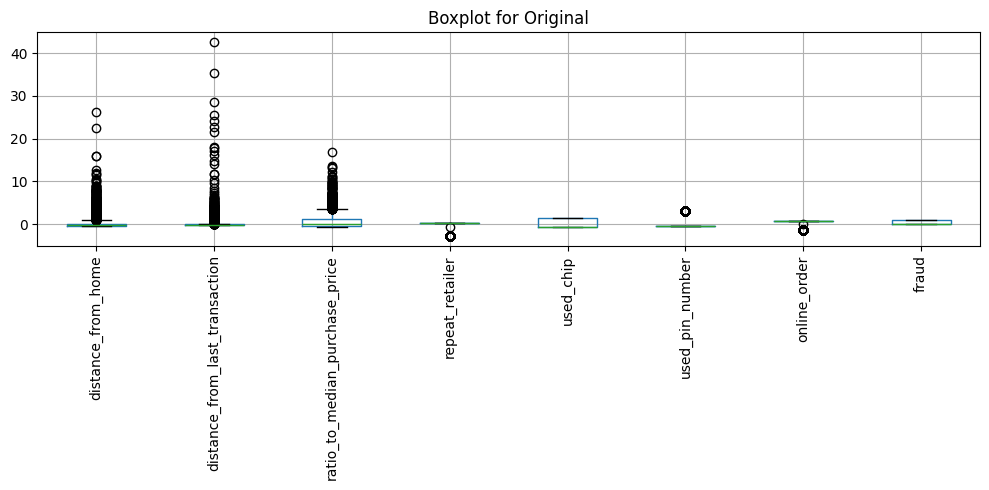

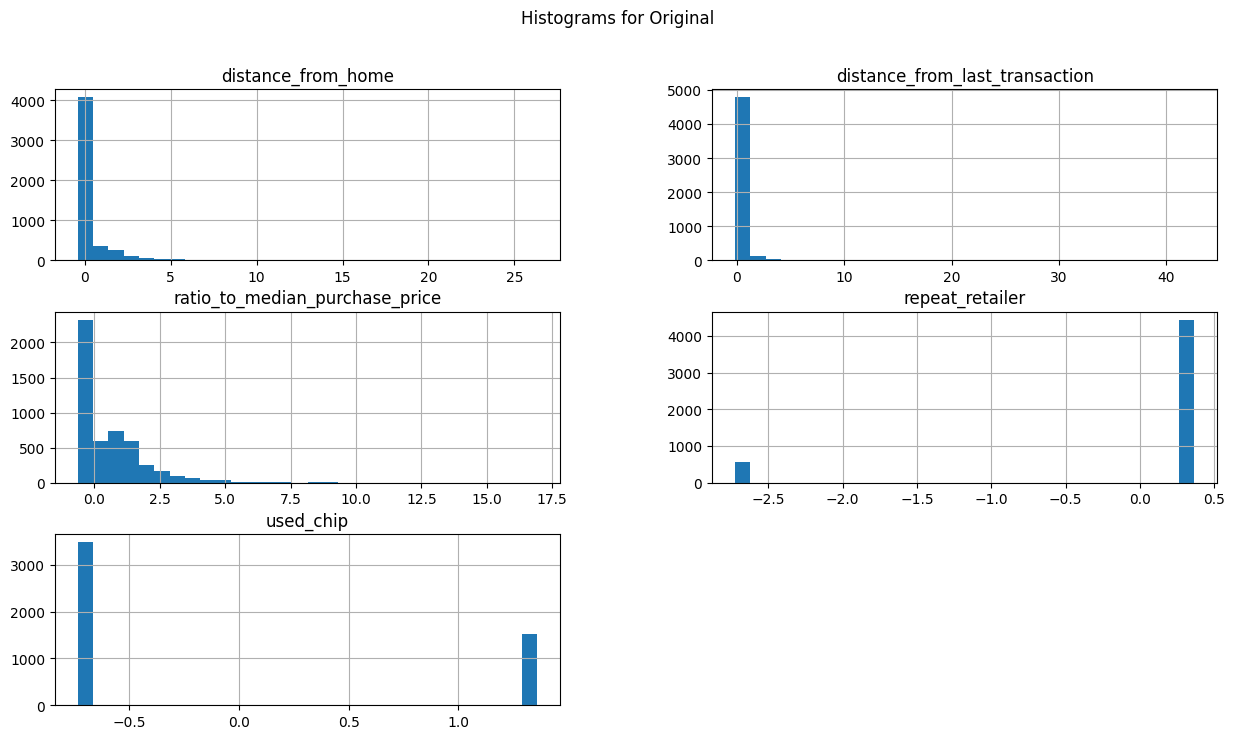

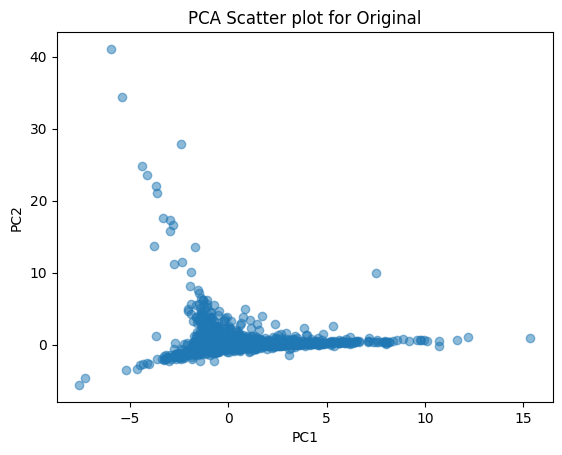

Original - Mean pairwise distance: 3.6546, Std: 2.4743


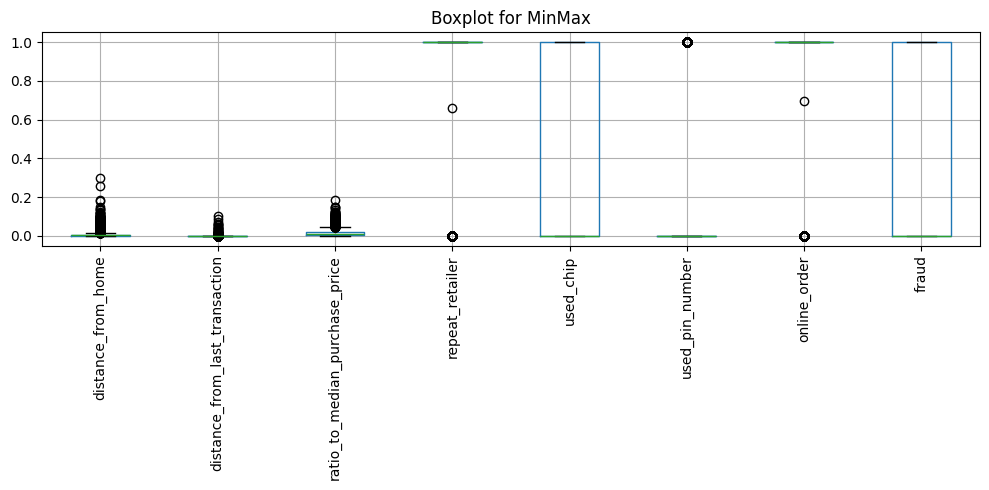

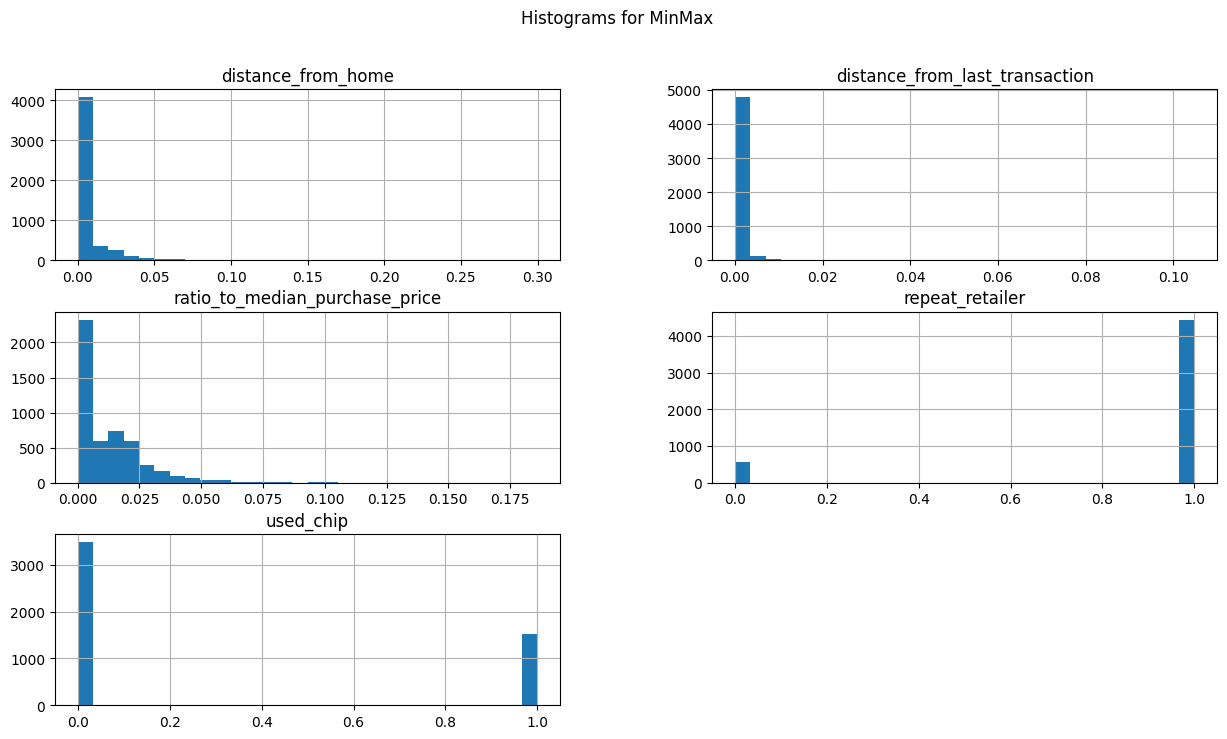

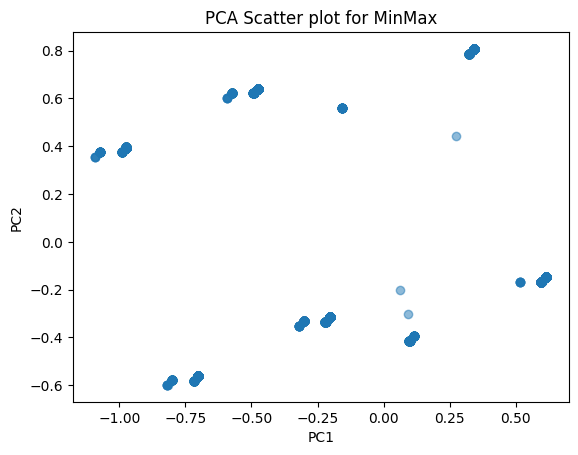

MinMax - Mean pairwise distance: 1.1242, Std: 0.5584


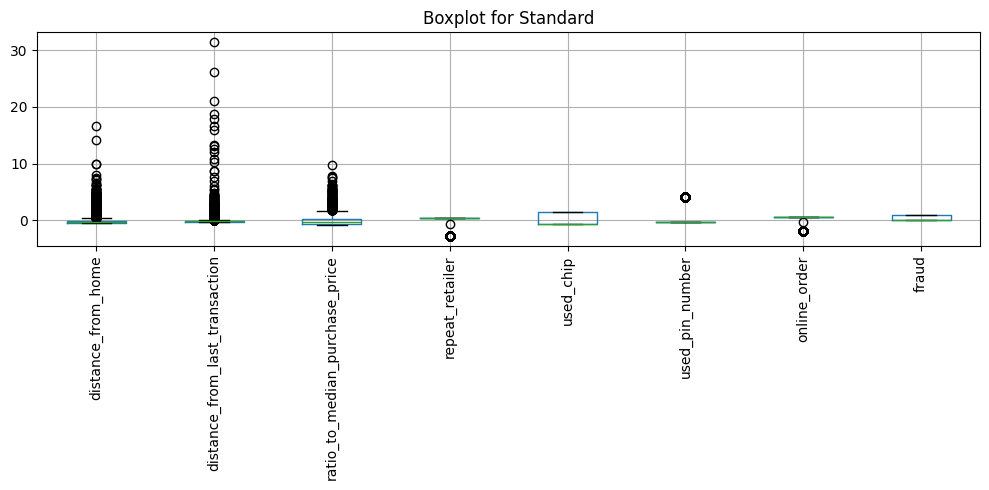

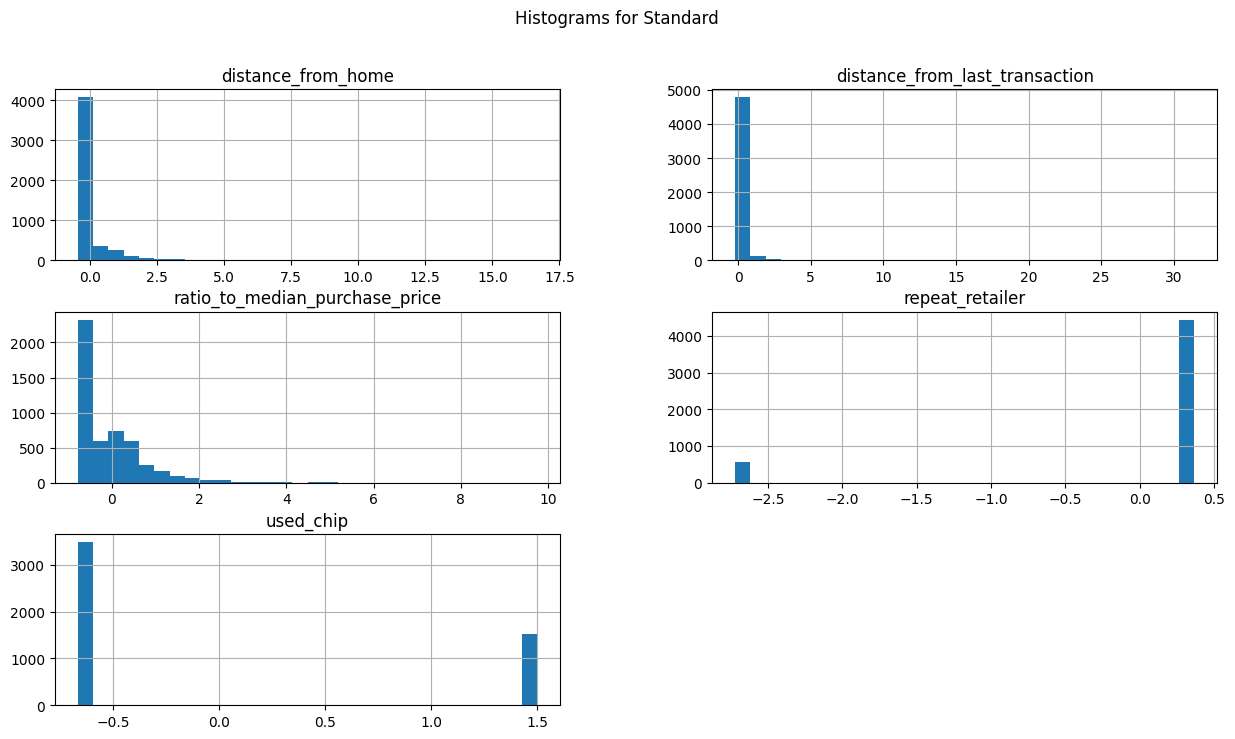

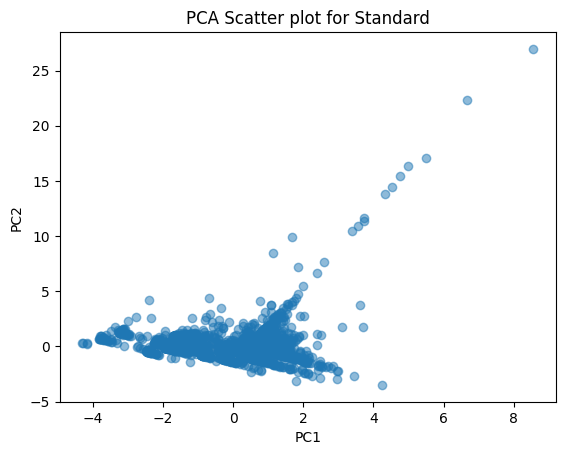

Standard - Mean pairwise distance: 3.2061, Std: 1.9064


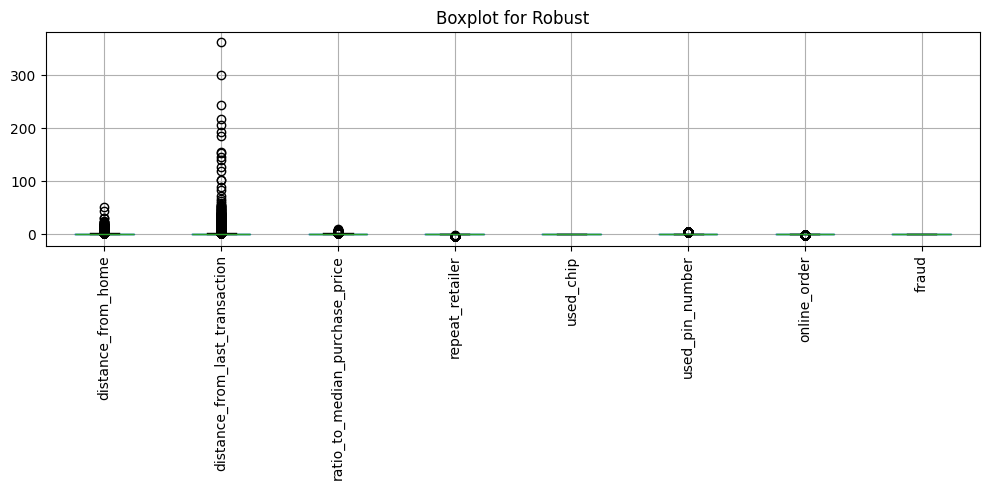

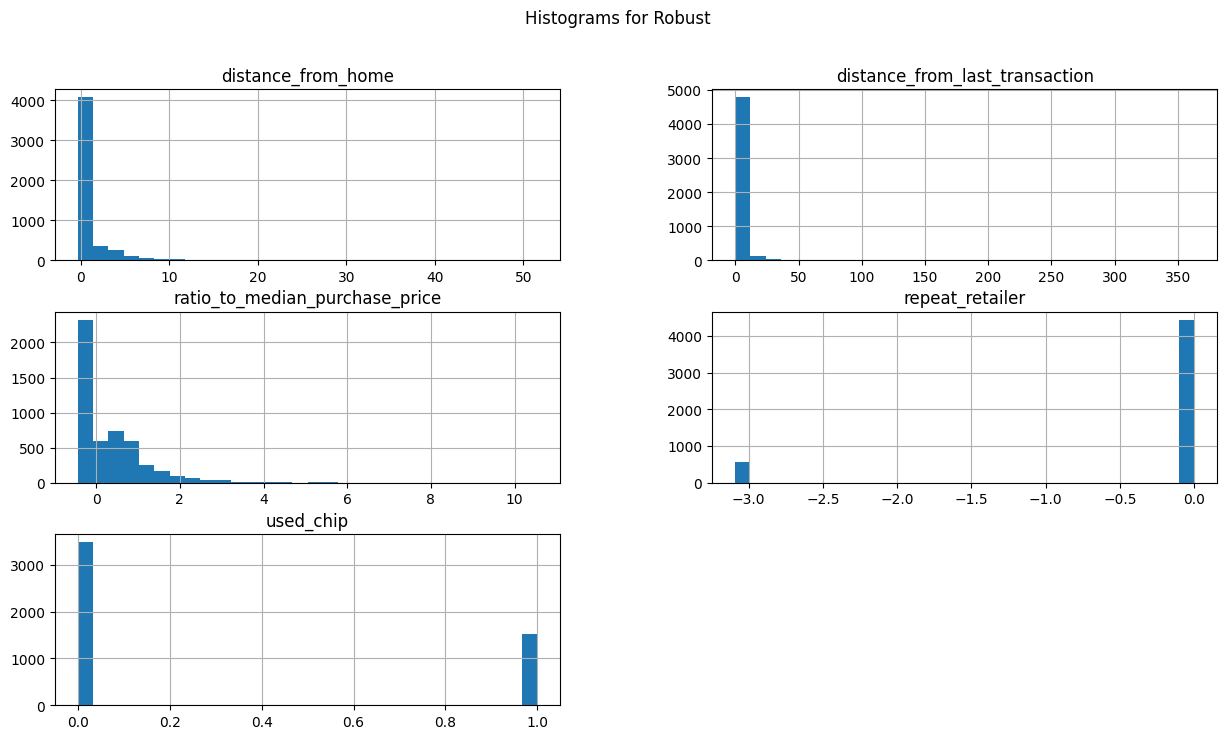

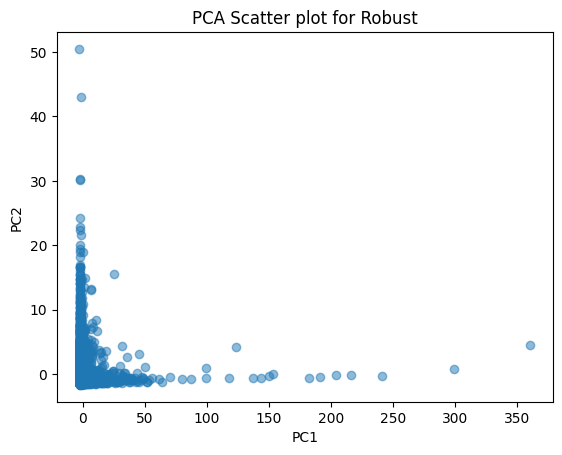

Robust - Mean pairwise distance: 6.8310, Std: 16.4435
                                 count      mean        std           min  \
distance_from_home              5000.0  0.254689   1.373096 -4.108133e-01   
distance_from_last_transaction  5000.0  0.113408   1.431194 -1.736469e-01   
ratio_to_median_purchase_price  5000.0  0.640211   1.523669 -6.365344e-01   
repeat_retailer                 5000.0  0.022851   0.972288 -2.725359e+00   
used_chip                       5000.0 -0.098770   0.963450 -7.349803e-01   
used_pin_number                 5000.0 -0.141974   0.776709 -3.346835e-01   
online_order                    5000.0  0.267679   0.871238 -1.364948e+00   
fraud                           5000.0  0.494000   0.500014  0.000000e+00   
distance_from_home              5000.0  0.007466   0.015393  5.142632e-06   
distance_from_last_transaction  5000.0  0.000703   0.003507  1.923058e-07   
ratio_to_median_purchase_price  5000.0  0.013575   0.016126  6.287760e-05   
repeat_retailer       

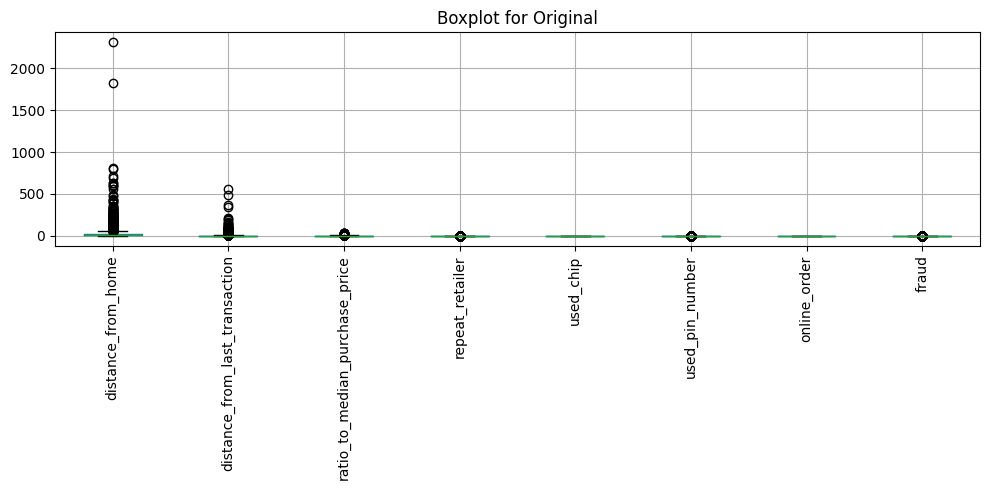

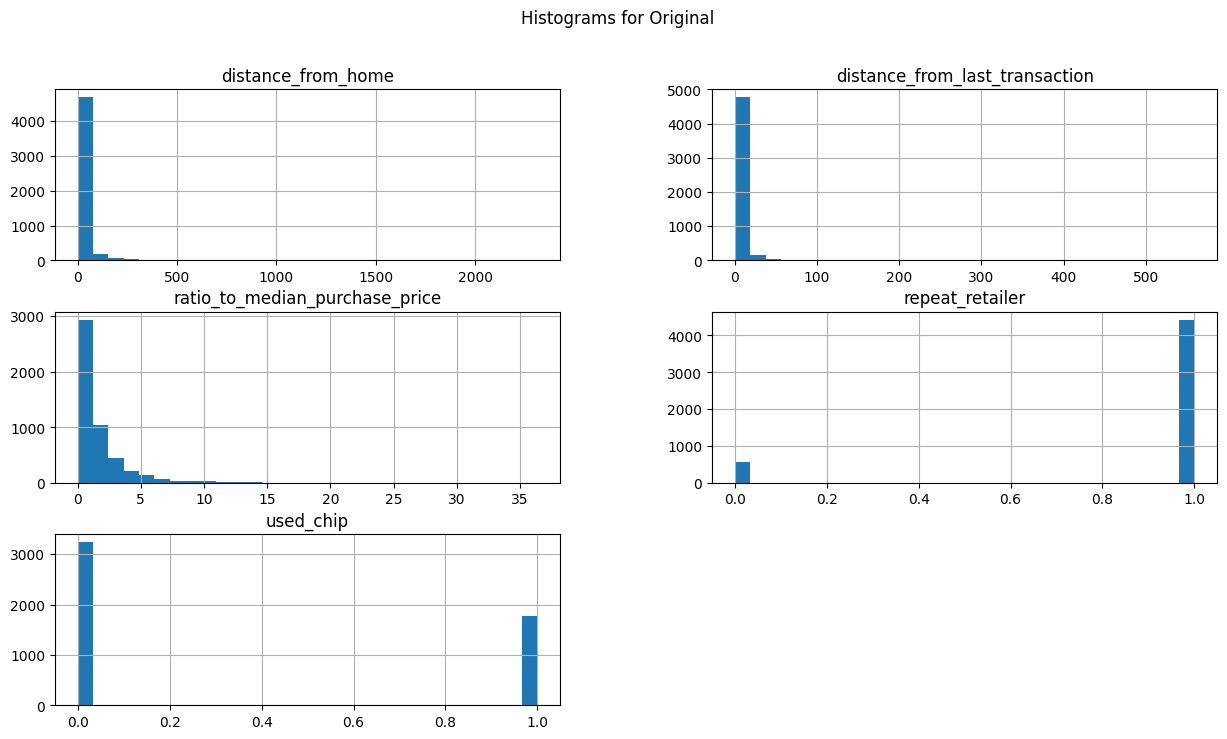

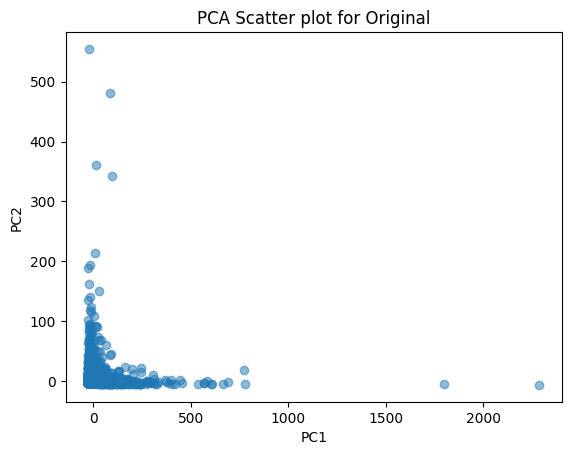

Original - Mean pairwise distance: 38.8236, Std: 86.9461


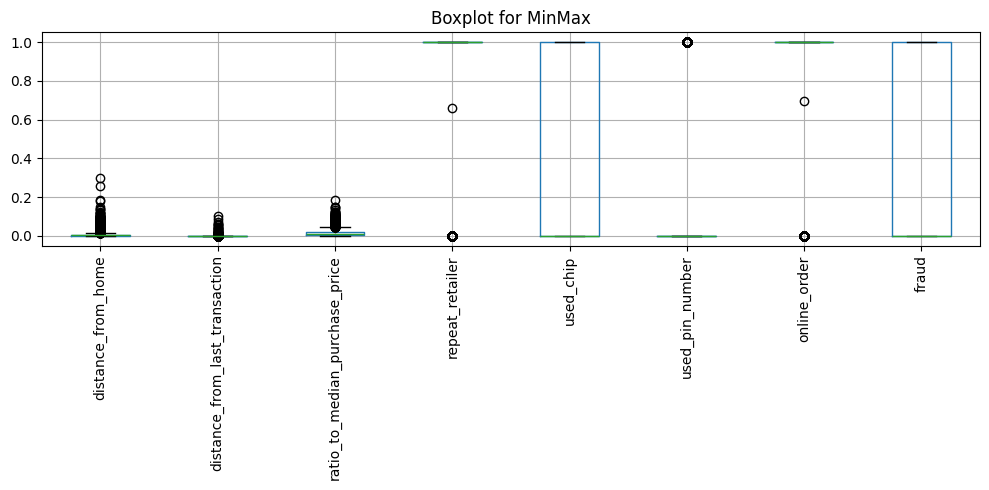

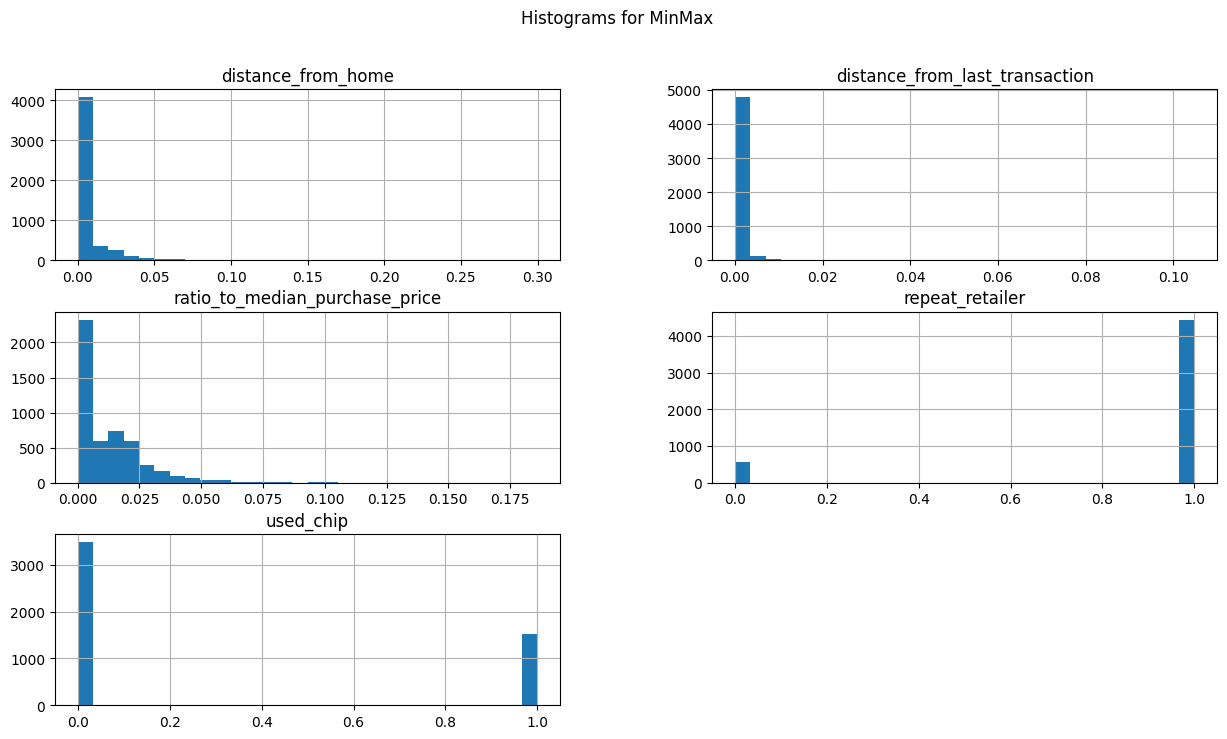

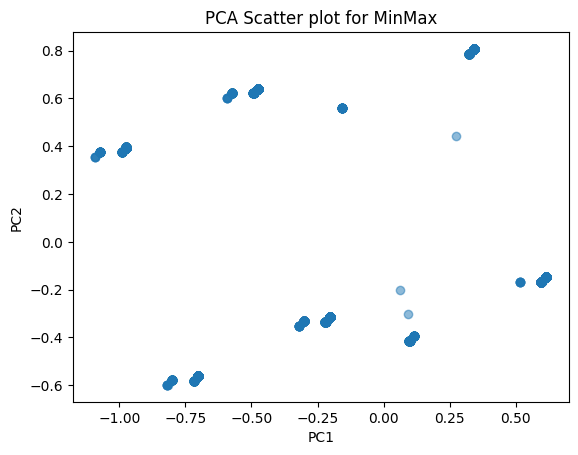

MinMax - Mean pairwise distance: 1.1242, Std: 0.5584


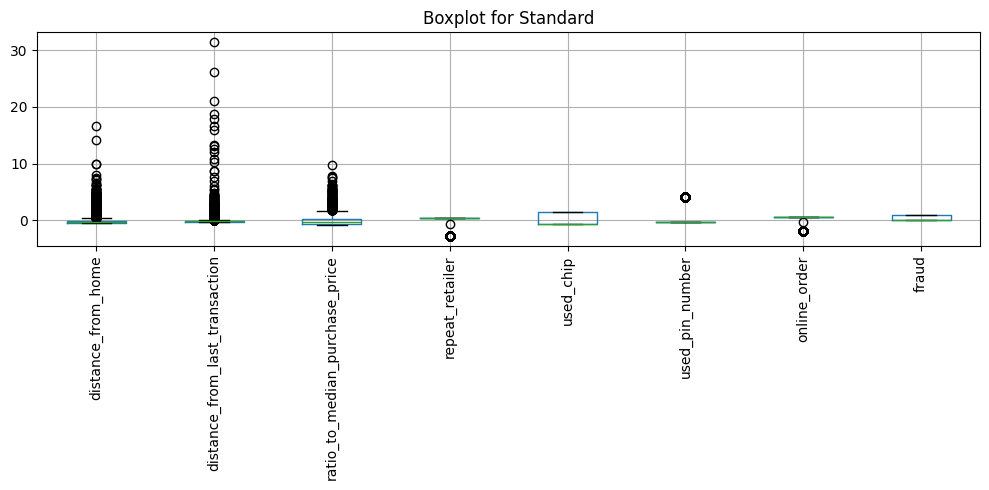

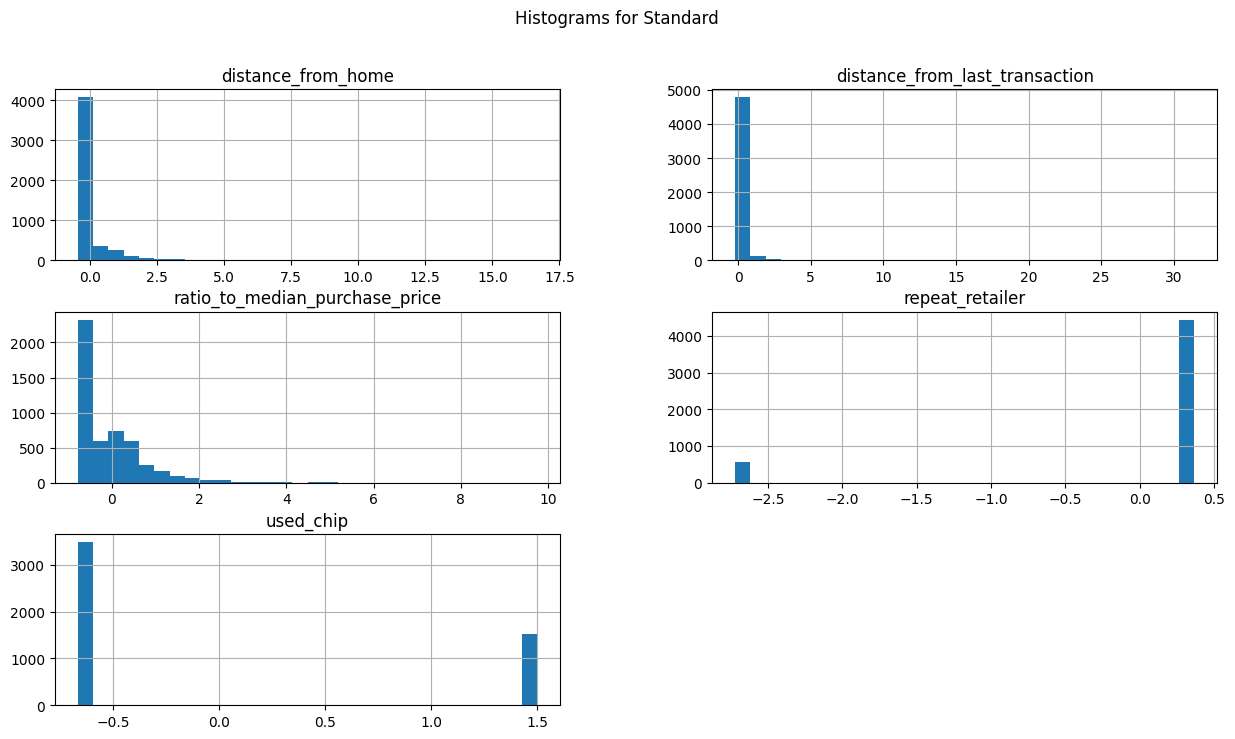

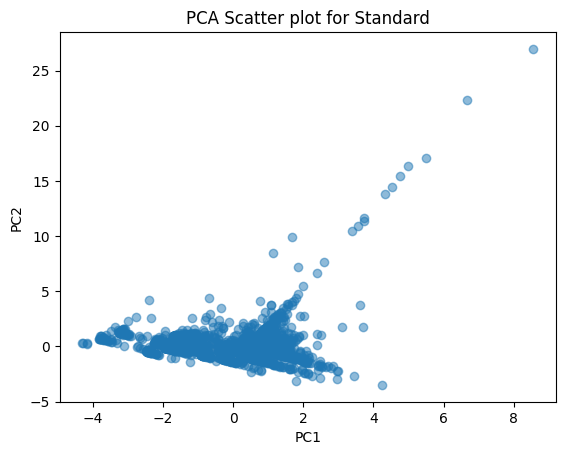

Standard - Mean pairwise distance: 3.2061, Std: 1.9064


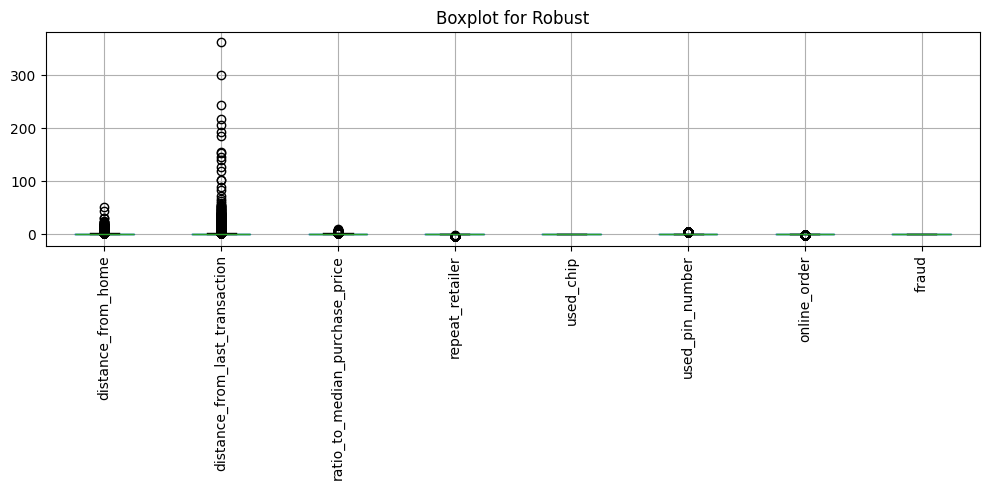

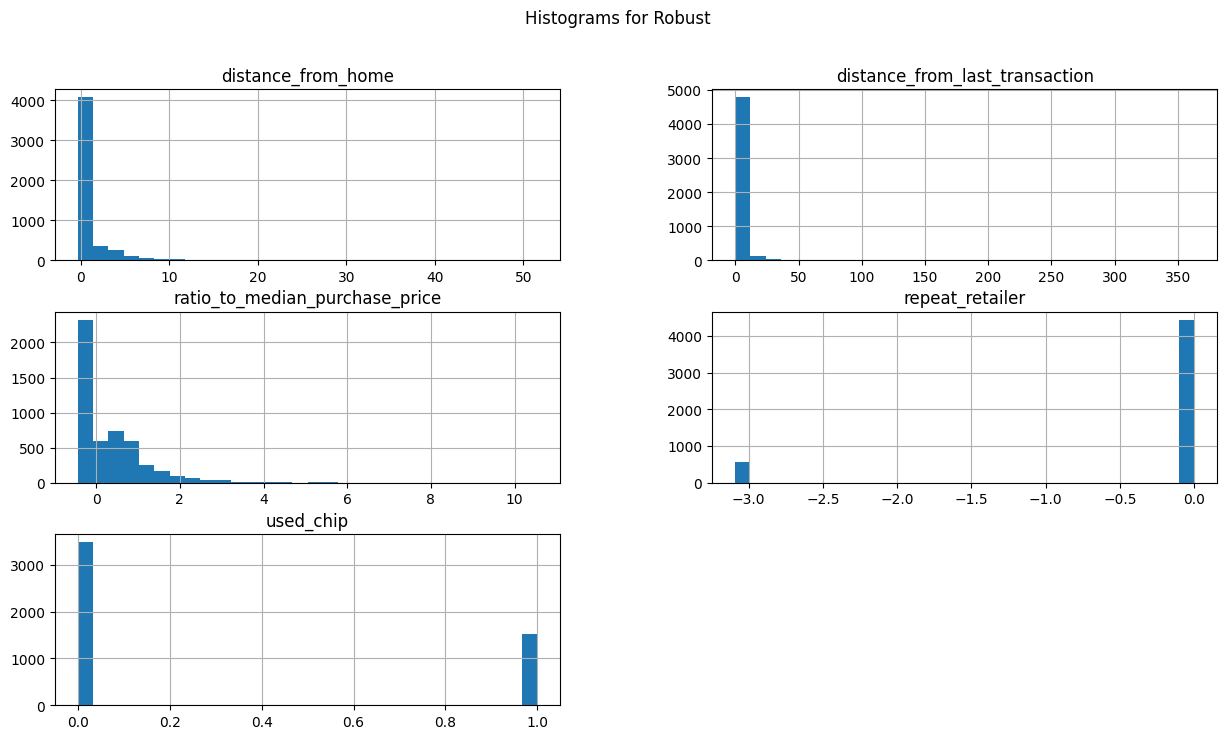

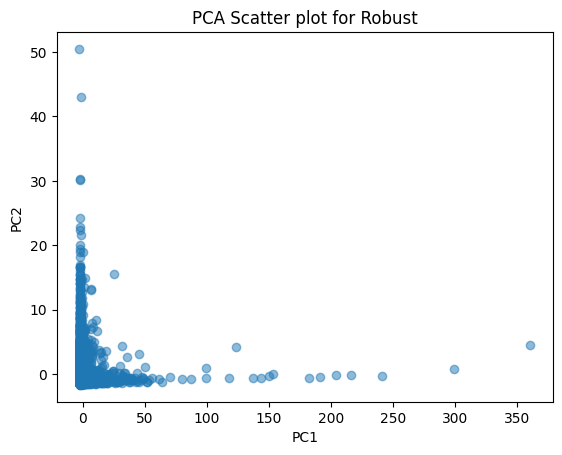

Robust - Mean pairwise distance: 6.8310, Std: 16.4435
                                 count       mean        std           min  \
distance_from_home              5000.0  25.597917  65.120827  1.141068e-01   
distance_from_last_transaction  5000.0   4.462980  16.931106  2.944445e-03   
ratio_to_median_purchase_price  5000.0   1.769113   2.498588  2.405965e-02   
repeat_retailer                 5000.0   0.884600   0.319536  0.000000e+00   
used_chip                       5000.0   0.353000   0.477951  0.000000e+00   
used_pin_number                 5000.0   0.107200   0.309398  0.000000e+00   
online_order                    5000.0   0.642400   0.479341  0.000000e+00   
fraud                           5000.0   0.083000   0.275910  0.000000e+00   
distance_from_home              5000.0   0.007466   0.015393  5.142632e-06   
distance_from_last_transaction  5000.0   0.000703   0.003507  1.923058e-07   
ratio_to_median_purchase_price  5000.0   0.013575   0.016126  6.287760e-05   
repeat_ret

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.stats import skew, kurtosis

def compare_normalizations(original_df, norm_dfs, norm_names):
    results = []

    def compute_metrics(df, name):
        desc = df.describe().T
        desc['skew'] = df.apply(skew)
        desc['kurtosis'] = df.apply(kurtosis)
        desc['normalization'] = name
        results.append(desc)

        # Plot boxplots
        df.boxplot(figsize=(10, 5))
        plt.title(f'Boxplot for {name}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        # Plot histograms (first few features for brevity)
        df.iloc[:, :5].hist(figsize=(15, 8), bins=30)
        plt.suptitle(f'Histograms for {name}')
        plt.show()

        # PCA scatter plot
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(df)
        plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.5)
        plt.title(f'PCA Scatter plot for {name}')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()

        # Pairwise distance stats
        dists = pairwise_distances(df)
        print(f"{name} - Mean pairwise distance: {dists.mean():.4f}, Std: {dists.std():.4f}")

    # Compute metrics for the original data
    compute_metrics(original_df, 'Original')

    # Compute metrics for each normalization
    for norm_df, norm_name in zip(norm_dfs, norm_names):
        compute_metrics(norm_df, norm_name)

    # Combine and display metrics
    summary = pd.concat(results)
    print(summary)

    return summary

# Use sample_df() to sample each dataframe for faster visualization
train_original_df = sample_df(pd.read_csv("../data/training/train_data_smote.csv"))
train_norm1_df = sample_df(pd.read_csv("../data/training/train_normal_1.csv"))
train_norm2_df = sample_df(pd.read_csv("../data/training/train_normal_2.csv"))
train_norm3_df = sample_df(pd.read_csv("../data/training/train_normal_3.csv"))

test_original_df = sample_df(pd.read_csv("../data/testing/card_transdata_part2.csv"))
test_norm1_df = sample_df(pd.read_csv("../data/testing/test_normal_1.csv"))
test_norm2_df = sample_df(pd.read_csv("../data/testing/test_normal_2.csv"))
test_norm3_df = sample_df(pd.read_csv("../data/testing/test_normal_3.csv"))

# Compare normalizations on training data
print("Comparing normalizations on training data...")
train_results = compare_normalizations(
    train_original_df,
    [train_norm1_df, train_norm2_df, train_norm3_df],
    ['MinMax', 'Standard', 'Robust']
)

# Compare normalizations on testing data
print("Comparing normalizations on testing data...")
test_results = compare_normalizations(
    test_original_df,
    [train_norm1_df, train_norm2_df, train_norm3_df],
    ['MinMax', 'Standard', 'Robust']
)